# Image Classification with CIFAR-10 and Fashion MNIST

*Author: [Dimo Todorov]*

*Date: [15.08.2023]*

## Table of Contents

1. [Introduction](#Introduction)
2. [Prior Research](#Prior-Research)
3. [Short overview of the project](#Short-overview-of-the-project)
   - [CIFAR-10](#CIFAR-10)
   - [Fashion MNIST](#Fashion-MNIST)
4. [CIFAR-10 Analysis](pages/4.%20CIFAR-10_Experiment.ipynb)
   - [4.1 Image Preprocessing and Visualization on Frog Images](pages/4.1%20Frog_Images_Analysis.ipynb)
   - [4.2 Detailed SIFT Analysis with CIFAR-10 Dataset](pages/4.2%20CIFAR10_SIFT_Image_Analysis_Techniques_and_Insights.ipynb)
5. [Fashion MNIST Analysis](pages/5.%20Fashion_MNIST_Analysis.ipynb)
   - [5.1 Anomaly Detection in Fashion MNIST Dataset](pages/5.1%20Anomaly_Detection_in_Fashion_MNIST_Dataset.ipynb)
6.  [Models Data Preparation](pages/6.%20Data%20Preparation.ipynb)
7.  [Modeling](pages/7.%20Modeling.ipynb)
8.  [Training the Models](pages/8.%20Training%20the%20Models.ipynb)
9.  [Testing](pages/9.%20Testing%20and%20Performance%20Analysis.ipynb)
10. [Using the Models](pages/10.%20Using%20Models.ipynb)
11. [Conclusion](#Conclusion)


## Import dependencies

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Introduction

Image classification stands as a cornerstone in the realm of computer vision and machine learning. From healthcare diagnostics to automated driving systems, the ability to accurately classify images plays an integral role in numerous technology-driven sectors. The primary objective of this project is to dive deep into the realm of image classification, leveraging two diverse datasets: CIFAR-10 and Fashion MNIST. Through this exploration, we aim not only to understand the nuances of each dataset but also to benchmark and compare the performance of classification models trained on each.

## Prior Research

Understanding the broader landscape of image classification requires acknowledging the pivotal works and research milestones that have shaped the field. A few seminal works include:

1. Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). [Imagenet classification with deep convolutional neural networks](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html). This paper introduced the AlexNet architecture, which revolutionized the field by winning the ImageNet LSVRC-2010 competition. It set the foundation for future deep learning architectures in image classification tasks.

2. LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). [Gradient-based learning applied to document recognition](https://ieeexplore.ieee.org/abstract/document/726791). This research introduced the LeNet-5 architecture, one of the first successful convolutional neural networks, primarily used for handwritten digit recognition in the MNIST dataset.

These references provide just a glimpse into the extensive research in the domain. Throughout this project, we will delve deeper into methodologies and techniques, drawing inspiration from these foundational works.


## Short overview of the project

In this section, we will focus on gathering and understanding the two datasets that we will use for image classification. The datasets include CIFAR-10 and Fashion MNIST, each representing distinct types of images and classification challenges.

### CIFAR-10

**Description**: The CIFAR-10 dataset consists of 60,000 color images of 32x32 pixels in size, distributed over 10 different classes. Each class has 6,000 images. The data is split into 50,000 training images and 10,000 test images.

**Classes**: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

CIFAR-10 Training images shape: (50000, 32, 32, 3)
CIFAR-10 Training labels shape: (50000, 1)
CIFAR-10 Testing images shape: (10000, 32, 32, 3)
CIFAR-10 Testing labels shape: (10000, 1)


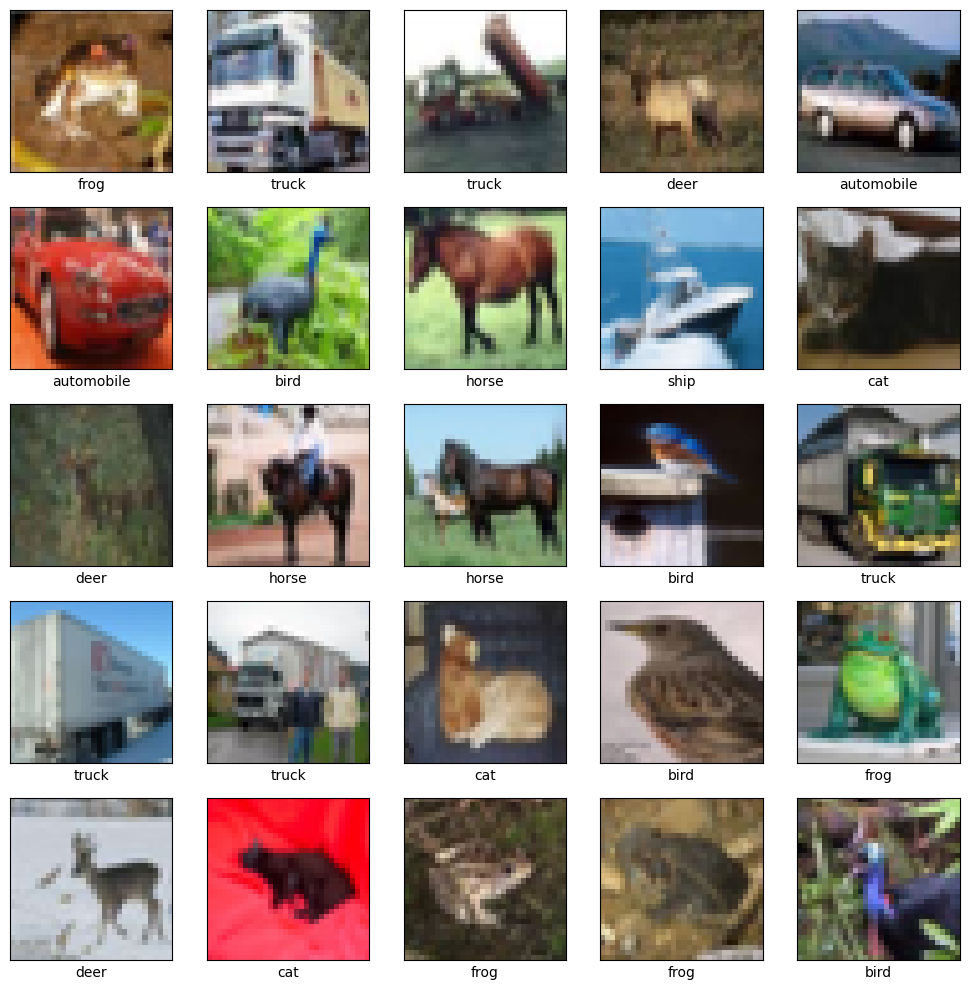

In [2]:
# Loading CIFAR-10 data
(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = tf.keras.datasets.cifar10.load_data()

# Displaying the shape of the data
print(f"CIFAR-10 Training images shape: {train_images_cifar.shape}")
print(f"CIFAR-10 Training labels shape: {train_labels_cifar.shape}")
print(f"CIFAR-10 Testing images shape: {test_images_cifar.shape}")
print(f"CIFAR-10 Testing labels shape: {test_labels_cifar.shape}")

# Visualizing some images from CIFAR-10
class_names_cifar = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_cifar[i])
    plt.xlabel(class_names_cifar[int(train_labels_cifar[i])])
plt.tight_layout()
plt.show()

### Fashion MNIST

**Description**: Fashion MNIST contains 70,000 grayscale images of 28x28 pixels each, spread across 10 categories. It is intended as a more challenging replacement for the classic MNIST dataset.

**Classes**: t-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot.


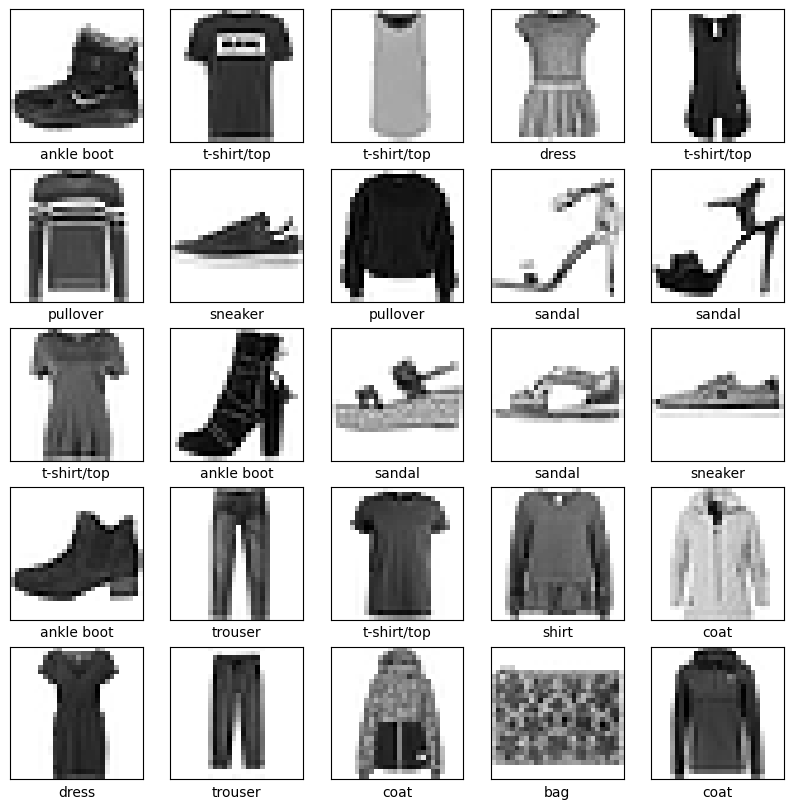

In [3]:
# Loading Fashion MNIST data
(train_images_fmnist, train_labels_fmnist), (test_images_fmnist, test_labels_fmnist) = tf.keras.datasets.fashion_mnist.load_data()

# Visualization of sample images from Fashion MNIST
class_names_fmnist = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_fmnist[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_fmnist[train_labels_fmnist[i]])
plt.show()


### Class Distribution in CIFAR-10 Training Set

Let's begin by examining the distribution of classes in the CIFAR-10 dataset. This will help us ensure that we have a balanced dataset, which is crucial for training an unbiased model.


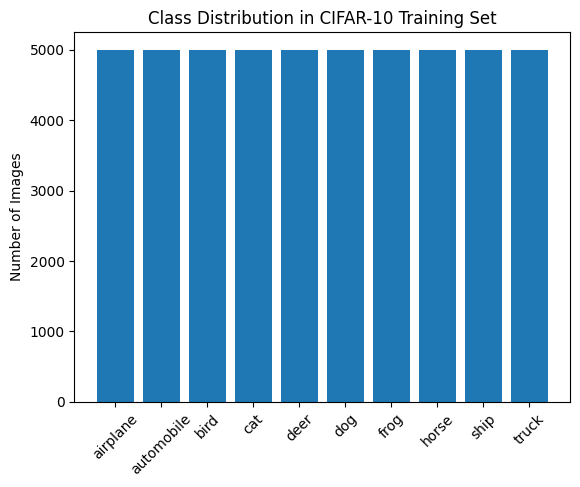

In [4]:
# Analyzing the distribution of classes in CIFAR-10
unique, counts = np.unique(train_labels_cifar, return_counts=True)
plt.bar(class_names_cifar, counts)
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


Furthermore, let's examine a few images from the CIFAR-10 dataset. This will give us a sense of the image quality, colors, and the challenges we might face in distinguishing between the classes.


### Class Distribution in Fashion MNIST

Similarly, we'll analyze the class distribution for the Fashion MNIST dataset.


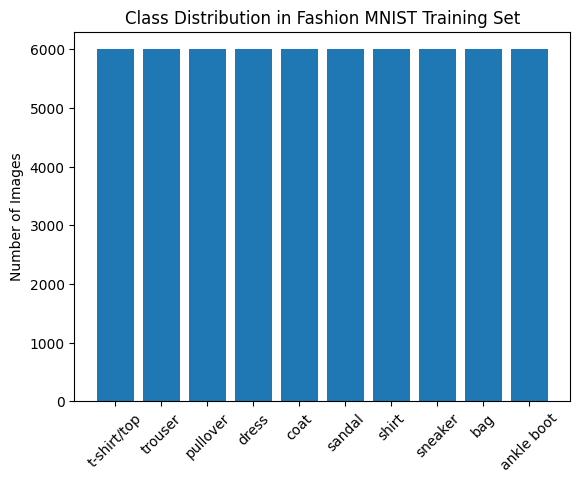

In [5]:
# Analyzing the distribution of classes in Fashion MNIST
unique_fmnist, counts_fmnist = np.unique(train_labels_fmnist, return_counts=True)
plt.bar(class_names_fmnist, counts_fmnist)
plt.title('Class Distribution in Fashion MNIST Training Set')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


### CIFAR-10: Pixel Intensity

Pixel intensities can provide insights into the overall brightness and contrast of the images in our dataset. Let's examine the distribution of pixel intensities for the CIFAR-10 dataset.
We will explain in-depth in the next sessions of analysis of the CIFAR-10 dataset, looking at aspects such as color distribution, texture features, and other characteristics that might provide insights for classification.


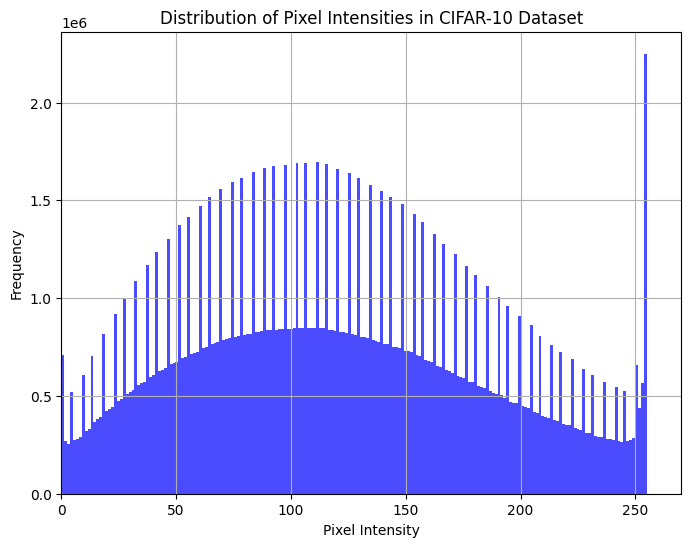

In [6]:
# Extracting pixel intensity values from CIFAR-10 dataset
pixel_intensities_cifar = train_images_cifar.flatten()

# Plotting distribution of pixel intensities for CIFAR-10
plt.figure(figsize=(8, 6))
plt.hist(pixel_intensities_cifar, bins=200, color='blue', alpha=0.7)
plt.title('Distribution of Pixel Intensities in CIFAR-10 Dataset')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([0, 270])
plt.show()


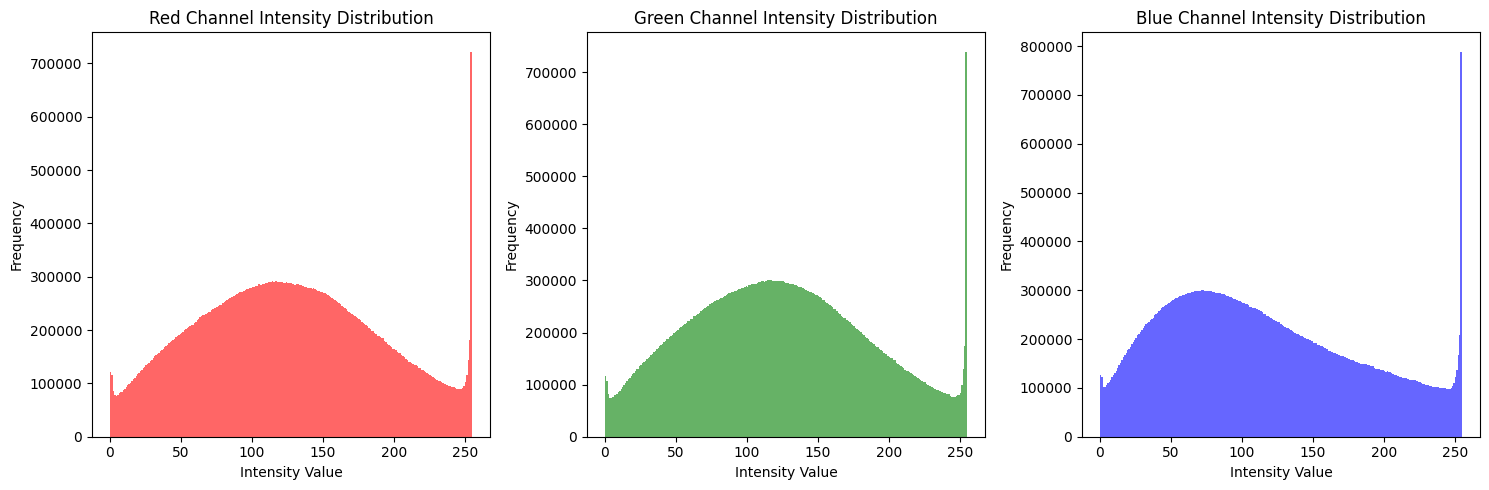

In [7]:
# Analysis of RGB channel distribution for CIFAR-10

# Extracting RGB intensities and plotting distributions
r_vals_cifar = train_images_cifar[:,:,:,0].flatten()
g_vals_cifar = train_images_cifar[:,:,:,1].flatten()
b_vals_cifar = train_images_cifar[:,:,:,2].flatten()

plt.figure(figsize=(15,5))

# Red Channel
plt.subplot(1,3,1)
plt.hist(r_vals_cifar, bins=255, color='red', alpha=0.6)
plt.title('Red Channel Intensity Distribution')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

# Green Channel
plt.subplot(1,3,2)
plt.hist(g_vals_cifar, bins=255, color='green', alpha=0.6)
plt.title('Green Channel Intensity Distribution')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

# Blue Channel
plt.subplot(1,3,3)
plt.hist(b_vals_cifar, bins=255, color='blue', alpha=0.6)
plt.title('Blue Channel Intensity Distribution')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Fashion MNIST: Pixel Intensity Distributions

Similarly, let's view the pixel intensities for the Fashion MNIST dataset. Since these images are grayscale, we'll focus on the distribution of brightness across the dataset.
With the Fashion MNIST dataset being grayscale, the detailed analysis will focus on aspects such as pixel intensity distribution, edge detection, and other relevant features.

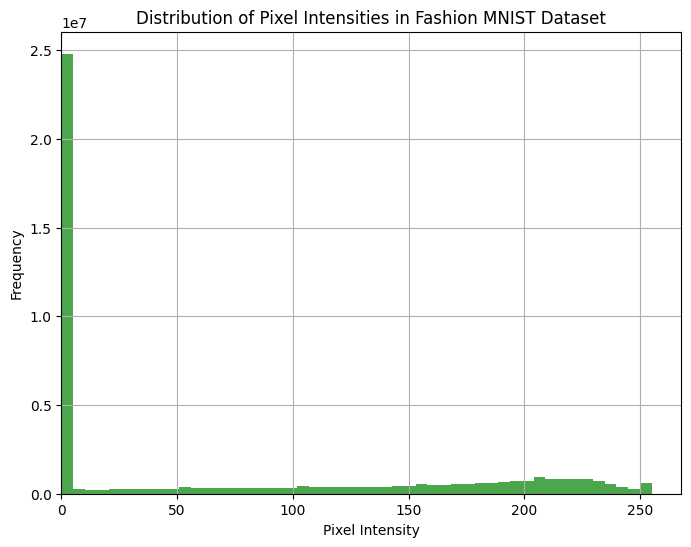

In [8]:
# Extracting pixel intensity values from Fashion MNIST dataset
pixel_intensities_fmnist = train_images_fmnist.flatten()

# Plotting distribution of pixel intensities for Fashion MNIST
plt.figure(figsize=(8, 6))
plt.hist(pixel_intensities_fmnist, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Pixel Intensities in Fashion MNIST Dataset')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0)
plt.show()


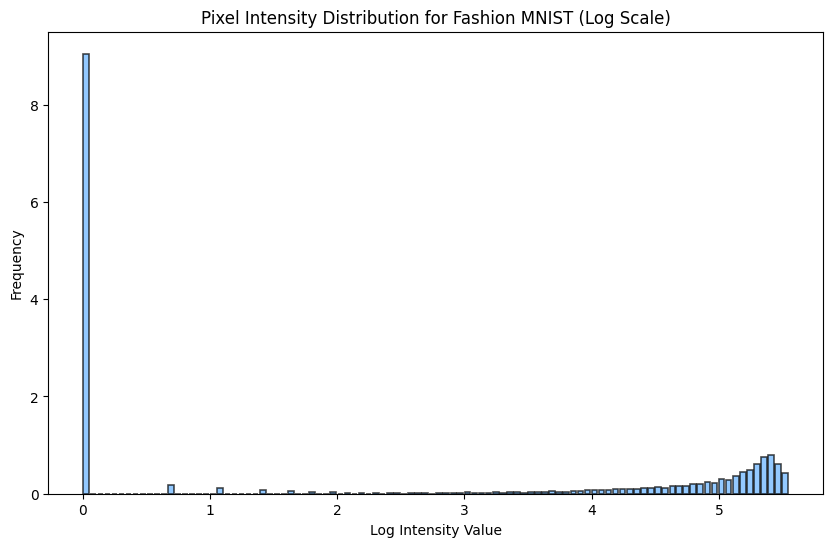

In [9]:
# Pixel intensity distribution for Fashion MNIST
pixel_intensities_fmnist = train_images_fmnist.flatten()

# Applying log transformation for better visibility
log_pixel_intensities_fmnist = np.log1p(pixel_intensities_fmnist)

plt.figure(figsize=(10, 6))
plt.hist(log_pixel_intensities_fmnist, bins=100, color='#66B2FF', alpha=0.7, edgecolor='black', linewidth=1.2, density=True, rwidth=0.8)
plt.title('Pixel Intensity Distribution for Fashion MNIST (Log Scale)')
plt.xlabel('Log Intensity Value')
plt.ylabel('Frequency')
plt.show()


1. **Pixel Intensity Distribution**: As observed from the histograms, CIFAR-10 images tend to have a wider range of pixel intensities compared to Fashion MNIST. This is expected given the color versus grayscale nature of the datasets.
2. **Complexity**: CIFAR-10 images, being colored and representing diverse objects, are inherently more complex than the grayscale, fashion-focused images of Fashion MNIST.
3. **Model Performance**: As observed from our modeling results, CIFAR-10 tends to be more challenging in terms of achieving high accuracy. This aligns with our understanding of the dataset's complexity.


In conclusion, while both datasets offer unique challenges, understanding their intricacies ensures we take an informed, data-centric approach to problem-solving. This is the essence of a data scientist's role: diving deep into the data, extracting insights, and leveraging those insights to inform subsequent steps, whether it be data preprocessing, modeling, or performance optimization.

---


# ``Conclusion``

The realm of image classification has been transformed with the advent of deep learning and rigorous data analysis techniques. This extensive research in classifying images from the CIFAR-10 and Fashion MNIST datasets not only highlighted the potential of meticulous data exploration but also showcased the innovative applications of machine learning in real-world scenarios.

## Datasets: More Than Just Images

We initiated our exploration with **CIFAR-10** and **Fashion MNIST**—two datasets that encapsulate a diverse range of images. CIFAR-10, with its vivid array of everyday objects, contrasts the Fashion MNIST's grayscale apparel-centric images, offering a broad spectrum of challenges and learning opportunities.

## Delving Deep into the Data

The deep dive into **CIFAR-10** in [`4. CIFAR-10_Experiment.ipynb`](pages/4.%20CIFAR-10_Experiment.ipynb)  wasn’t a mere perusal. Through intricate pixel distribution visualizations, it was discovered that certain classes, notably Frogs and Airplanes, exhibited intriguing behaviors, especially at the spectrum's extremities. Various preprocessing endeavors—like grayscale transformations, contour enhancements, and blurring—were more than just technical experiments; they were steps towards unearthing hidden patterns and features within the images.

Special focus on the Frog class in  [`4.1 Frog_Images_Analysis.ipynb`](pages/4.1%20Frog_Images_Analysis.ipynb) provided invaluable insights. From image normalization and inversion to detailed morphological processing, each step brought forth nuances that might be overlooked in a more superficial examination. Interactive morphological transformations became not just tools but visual narratives detailing the effects of these operations on image data.

**Fashion MNIST**'s exploration in [`5. Fashion_MNIST_Analysis.ipynb`](pages/5.%20Fashion_MNIST_Analysis.ipynb) showcased a blend of clustering techniques, statistical methods, and innovative visualizations. The Elbow method, for instance, allowed for a nuanced understanding of clusters, which was further enriched through tools like Pandas. The incorporation of the Local Binary Pattern (LBP) Analysis was more than a demonstration—it was an assertion of the power of modern texture descriptors in image analysis.

Our anomaly detection in  [`5.1 Anomaly_Detection_in_Fashion_MNIST_Dataset.ipynb`](pages/5.1%20Anomaly_Detection_in_Fashion_MNIST_Dataset.ipynb) was a highlight, unraveling nuances in data that could easily escape the untrained eye. The Sandal class emerged as a class of interest, with its distinct regular and anomalous samples. Pie charts, scatter plots, histograms—they weren’t mere visual aids, but essential storytelling tools, narrating the tales of anomalies within the dataset.

## From Analysis to Application

Data preparation in  [`6. Data Preparation.ipynb`](pages/6.%20Data%20Preparation.ipynb) was a testament to the fact that quality modeling requires quality data. Each model, designed in  [`7. Modeling.ipynb`](pages/7.%20Modeling.ipynb), was a product of rigorous thought, ensuring they were tailored for the specific challenges of our datasets.

The training phase  [`8. Training the Models.ipynb`](pages/8.%20Training%20the%20Models.ipynb) was a dynamic dance of feedback loops, refining and tuning, ensuring our models evolved and improved.  [`9. Testing and Performance Analysis.ipynb`](pages/9.%20Testing%20and%20Performance%20Analysis.ipynb) wasn’t just a performance report but an assurance of the models' robustness and reliability in diverse scenarios.

Finally, the real-world utility of our extensive work was manifested in  [`10. Using the Models.ipynb`](pages/10.%20Using%20Models.ipynb). It was a culmination, a practical demonstration of research meeting real-world applications.

## Reflecting on the Journey

This research journey transcended technical boundaries. It was a comprehensive exploration into the world of images, aiming to derive insights, detect patterns, and craft solutions from datasets that, on the surface, might seem ordinary. Through innovative feature detection, meticulous analysis, and cutting-edge modeling, we showcased the transformative potential of data-driven insights.

With every histogram, every pixel distribution, every anomaly detected, we’ve taken a step further in our understanding of image classification. Our findings have reiterated the power of machine learning and deep learning, proving their potential in revolutionizing how we perceive and interpret the visual world.

As we look ahead, this project serves as a foundation, a stepping stone towards more intricate explorations, more nuanced findings, and larger-scale applications. The world of image classification awaits, and this research is but a glimpse into its boundless possibilities.

---

[Back to Top](#table-of-contents)
